<div div style="text-align: center;">
<h1> Weather Classification </h1>
</div>

# Data Exploration

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import yaml
import os

In [2]:
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

data = config['paths']['data']
figure = config['paths']['figure']

In [3]:
df = pd.read_csv(data)
df.head(5)

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

In [4]:
num_feat = [feature for feature in df.columns if df[feature].dtype != 'O']
cate_feat = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'Numerical features: {num_feat} \n')
print(f'Categorical feaures: {cate_feat}\n')

Numerical features: ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)'] 

Categorical feaures: ['Cloud Cover', 'Season', 'Location', 'Weather Type']



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [6]:
df[num_feat].describe()

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%             1007.650000      3.000000         5.000000  
75%             1016.772500      7.000000         7.500000  
max             1199.210000     14.000000        20.000000

In [7]:
df[cate_feat].nunique()

Cloud Cover     4
Season          4
Location        3
Weather Type    4
dtype: int64

In [8]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

# Data Visualization

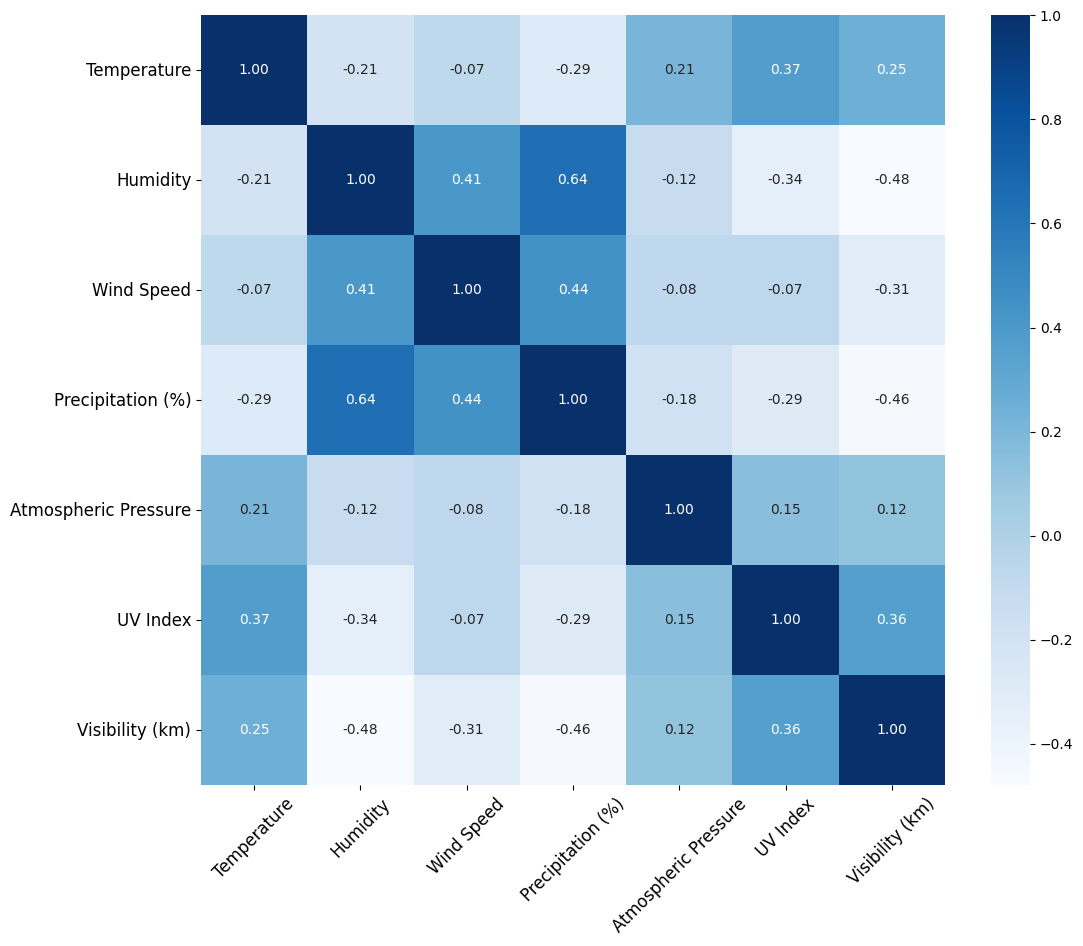

In [9]:
corr_matrix = df[num_feat].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.savefig(os.path.join(figure, 'Correlation_Matrix.png'))
plt.show()

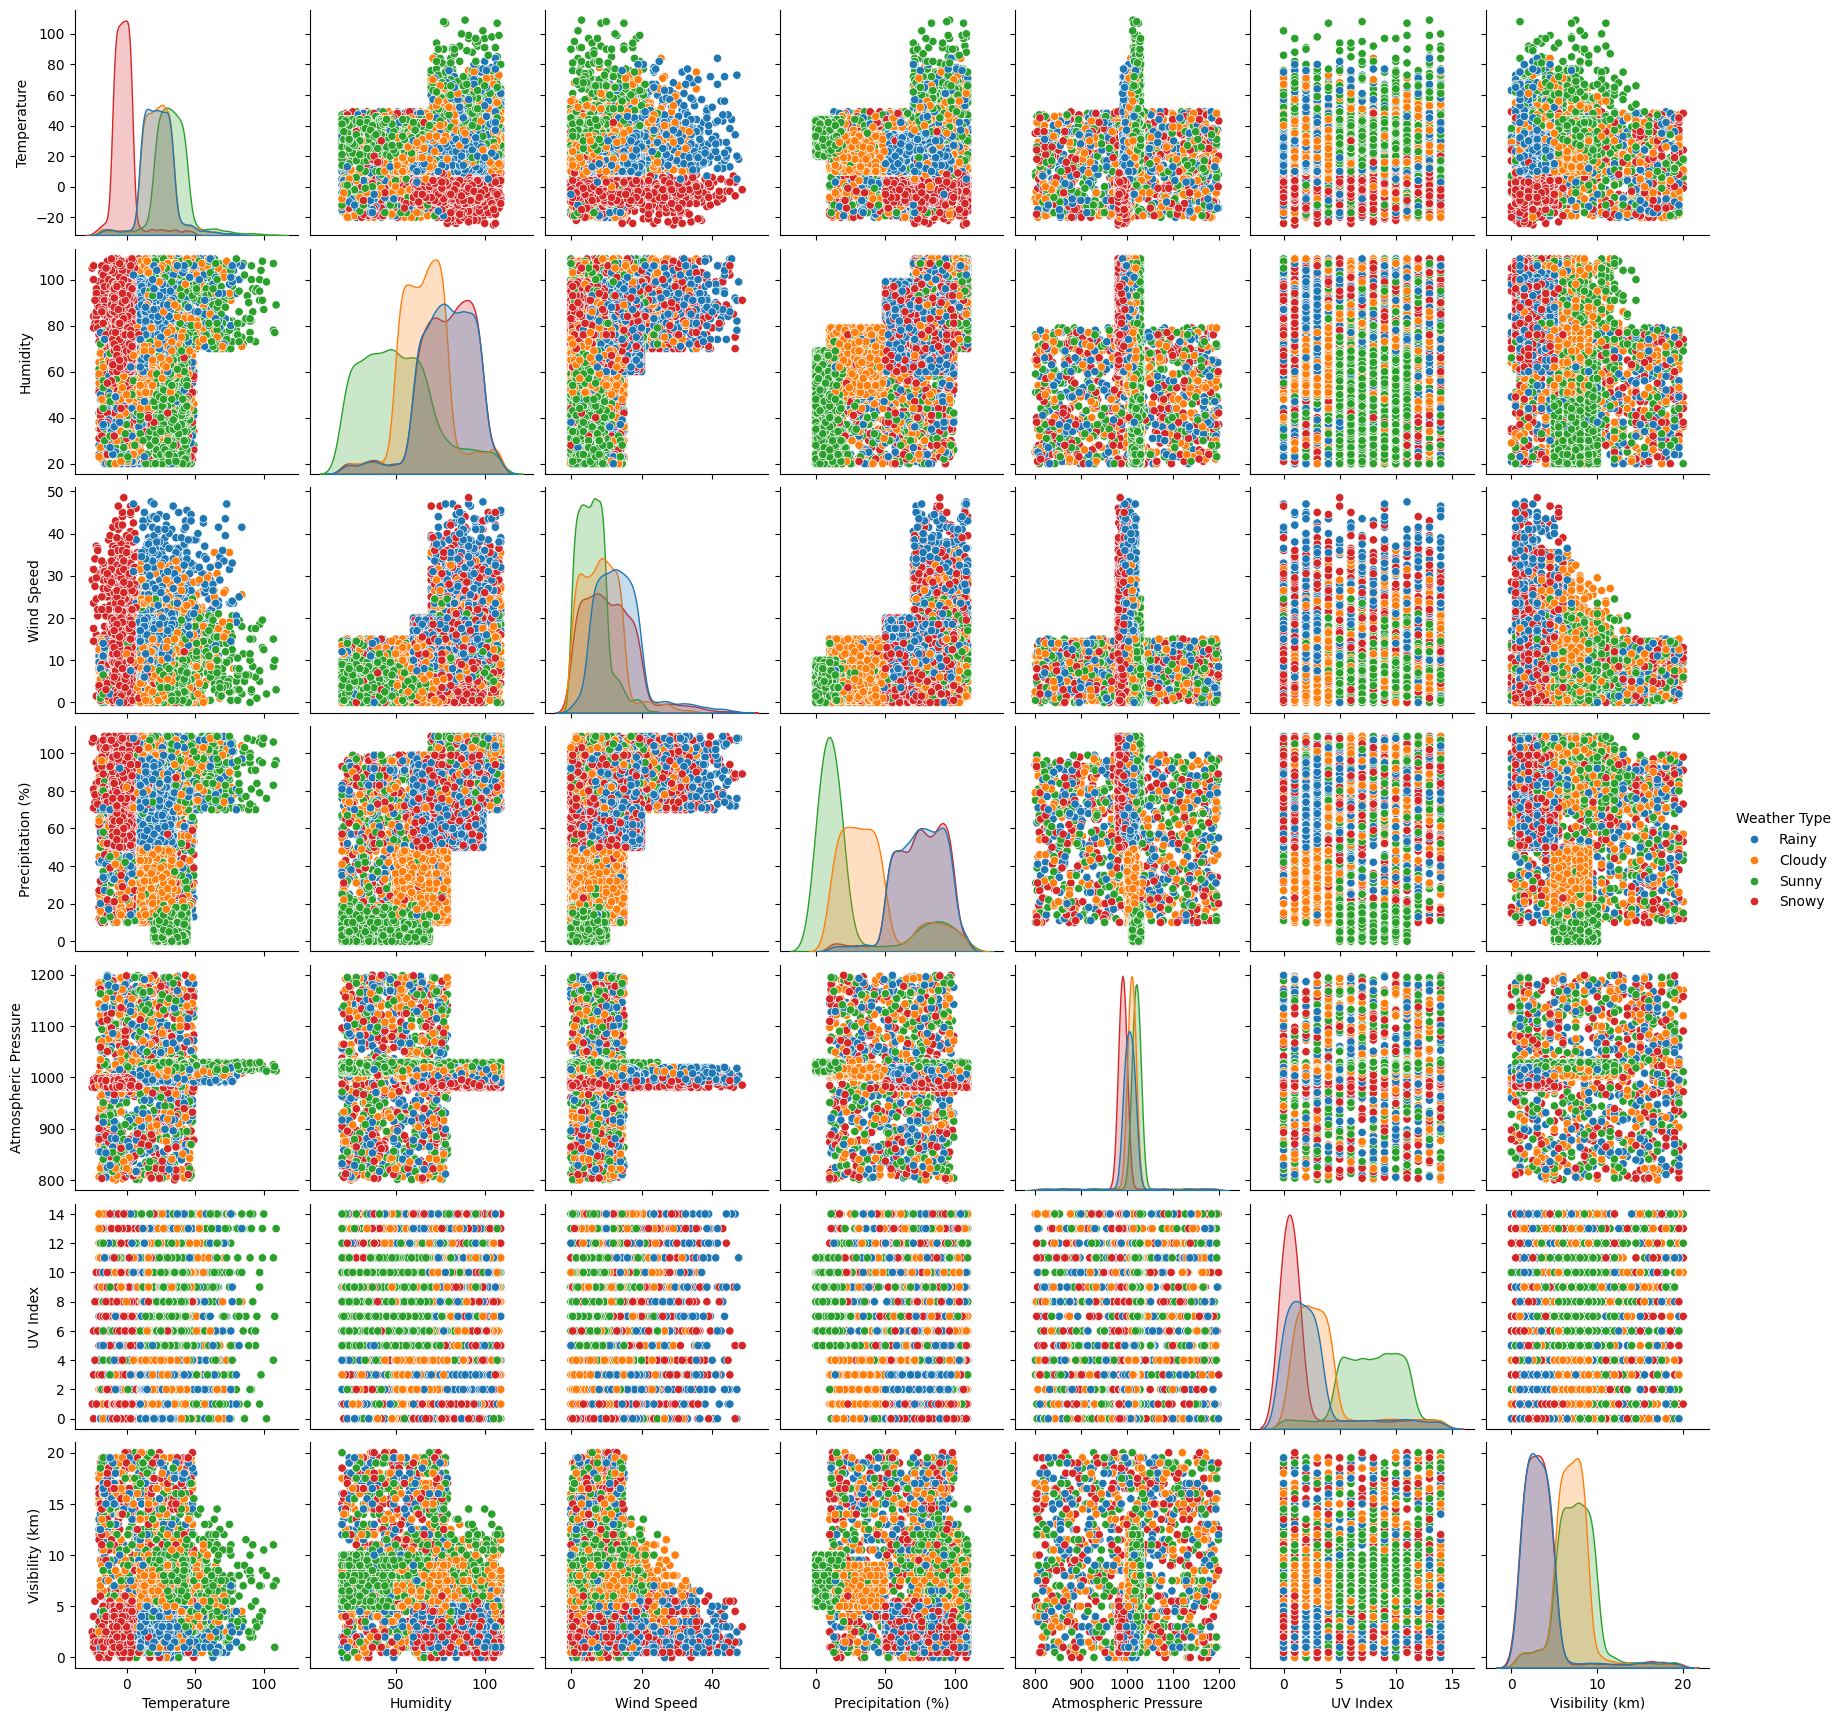

In [10]:
sns.pairplot(df, vars=['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'], diag_kind='kde', hue='Weather Type')
plt.savefig(os.path.join(figure, 'Pairplot.png'))
plt.show()

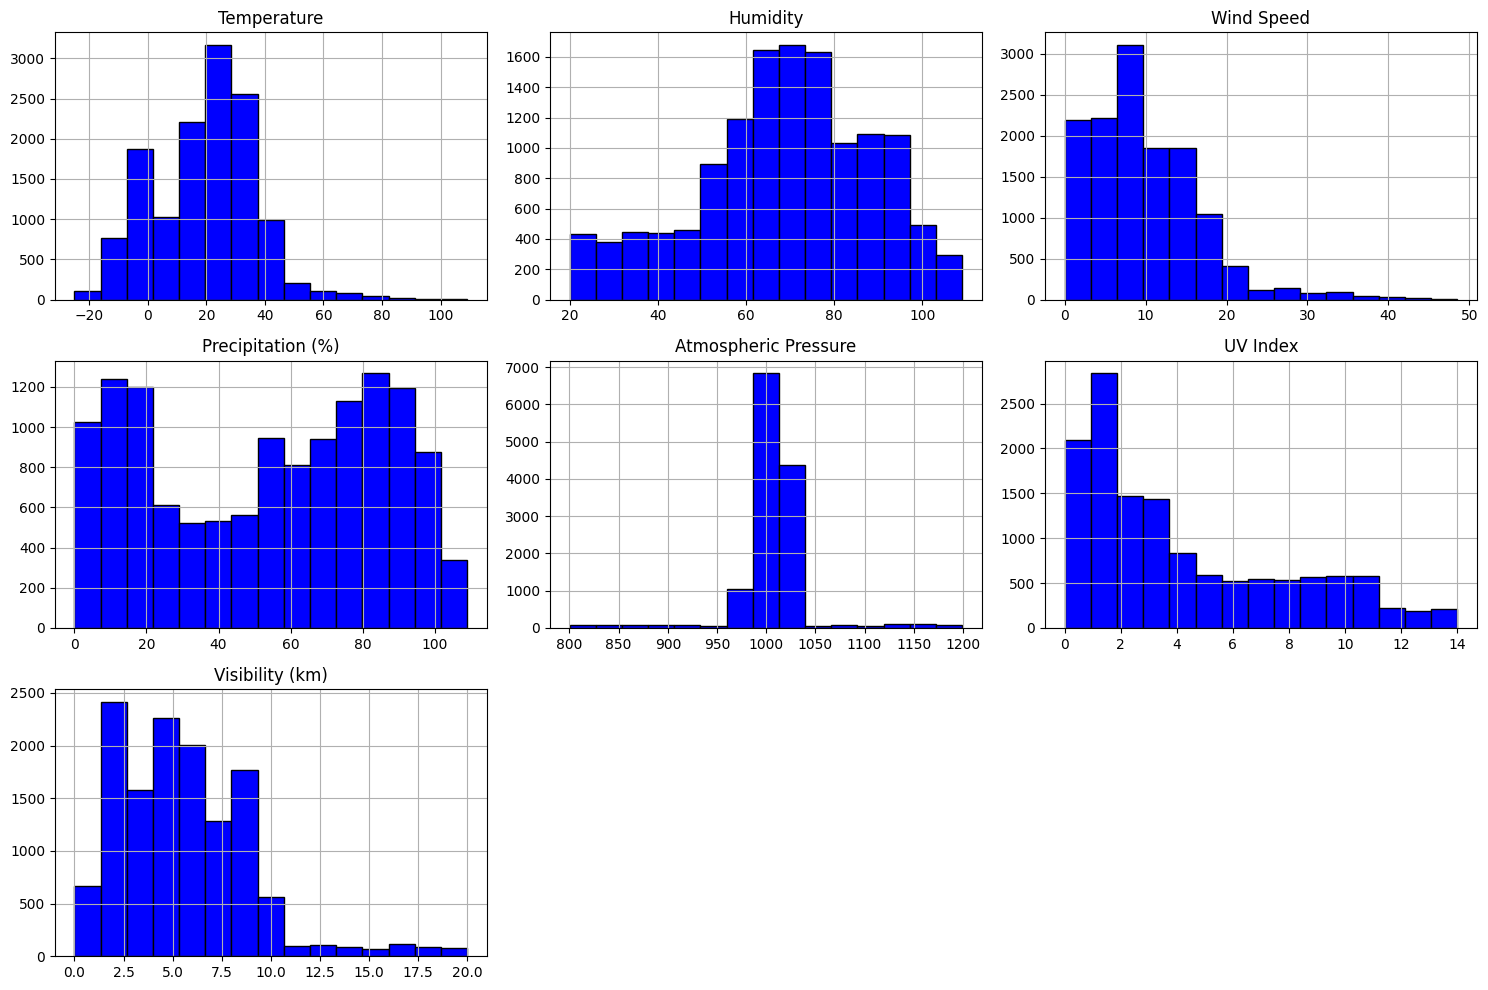

In [11]:
df[num_feat].hist(bins=15, figsize=(15, 10), color='blue', edgecolor='black')
plt.tight_layout()
plt.savefig(os.path.join(figure, 'Numerical_data_histogram.png'))
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_18532\2595749010.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette=palettes[idx])
C:\Users\Acer\AppData\Local\Temp\ipykernel_18532\2595749010.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette=palettes[idx])
C:\Users\Acer\AppData\Local\Temp\ipykernel_18532\2595749010.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette=palettes[idx])
C:\Users\Acer\AppData\Local\Temp\ipykernel_18532\2595749010.py:5: FutureWarn

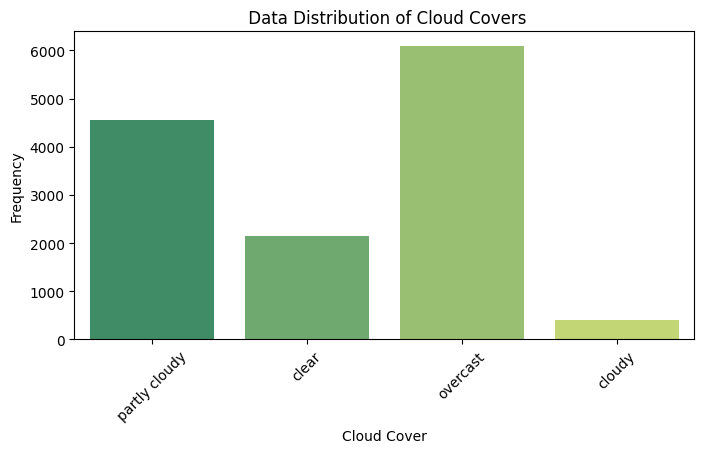

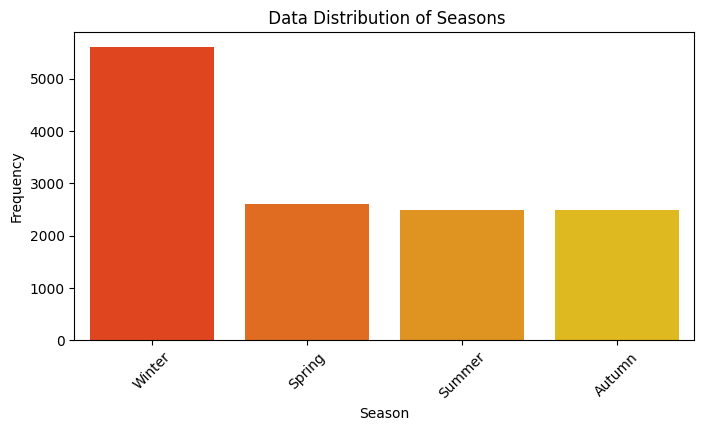

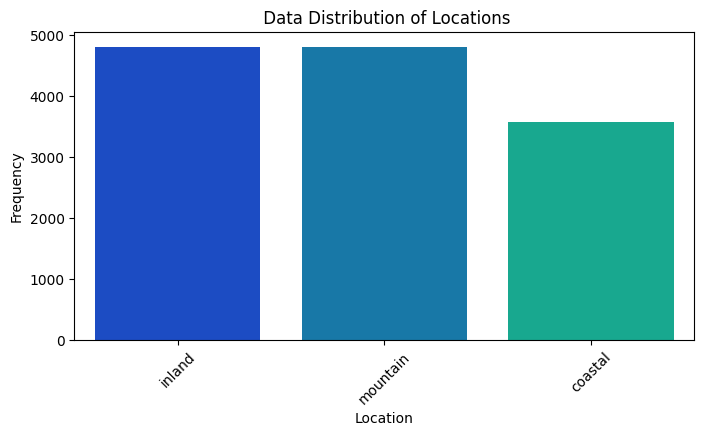

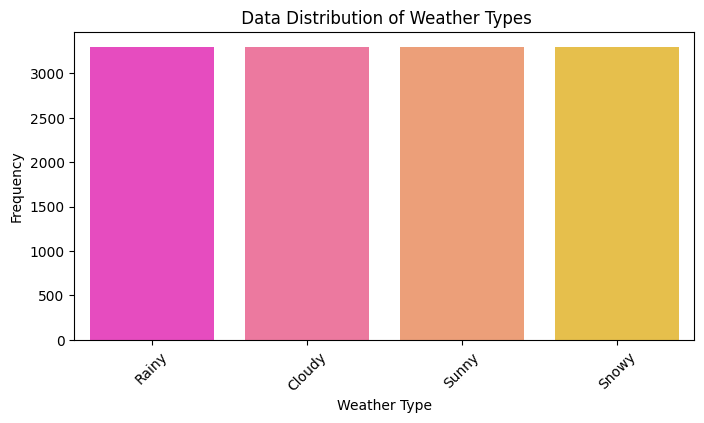

In [12]:
palettes = ['summer', 'autumn', 'winter', 'spring']

for idx, feature in enumerate(cate_feat):
    plt.figure(figsize = (8,4))
    sns.countplot(data=df, x=feature, palette=palettes[idx])
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(" Data Distribution of " + feature + "s")
    plt.xticks(rotation=45)
    plt.savefig(os.path.join(figure, f'Data Distribution of {feature}s'))
plt.show()

In [13]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

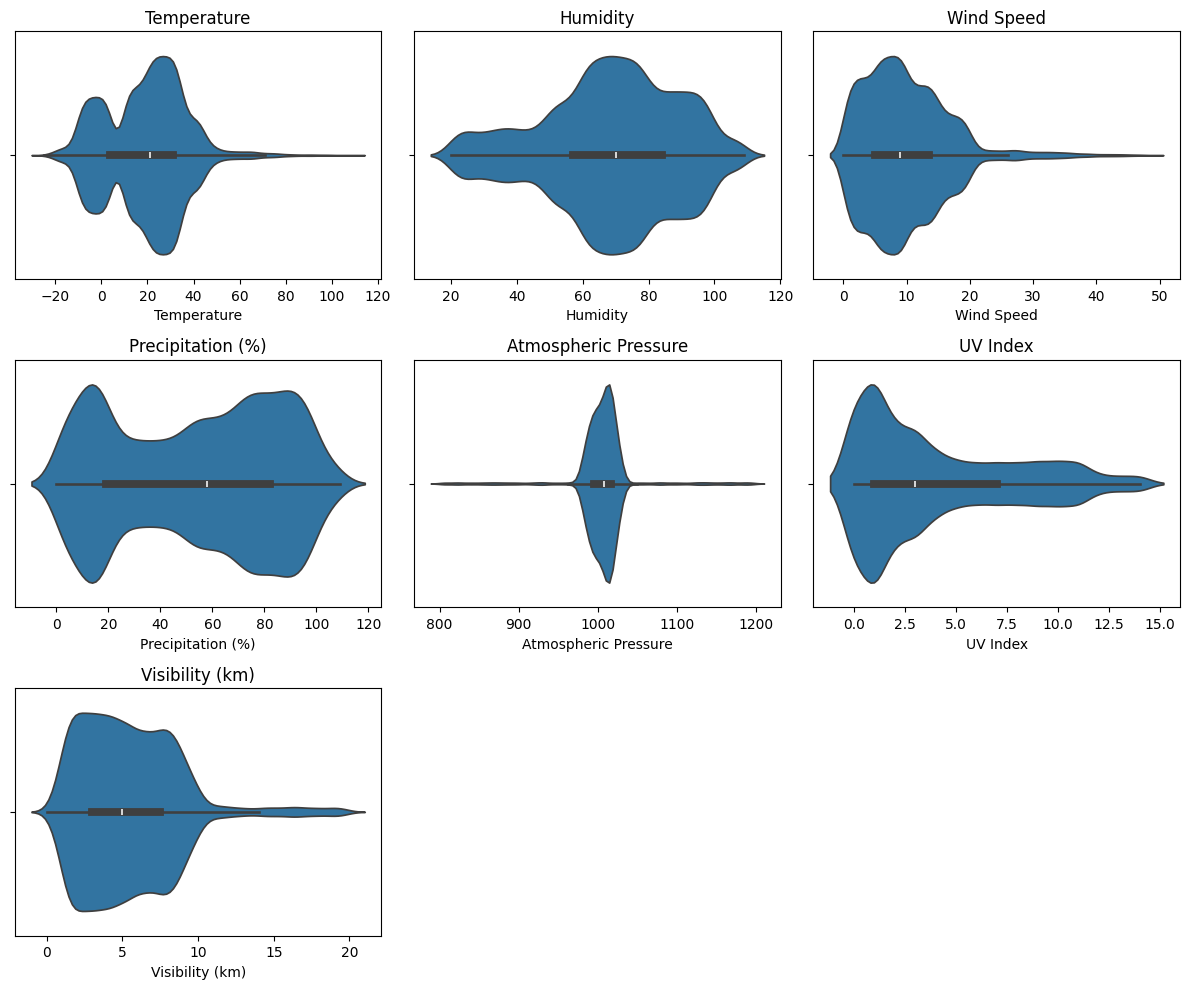

In [14]:
plt.figure(figsize=(12, 10))

for i, col in enumerate(num_feat, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.savefig(os.path.join(figure, 'Violin_plot.png'))
plt.show()

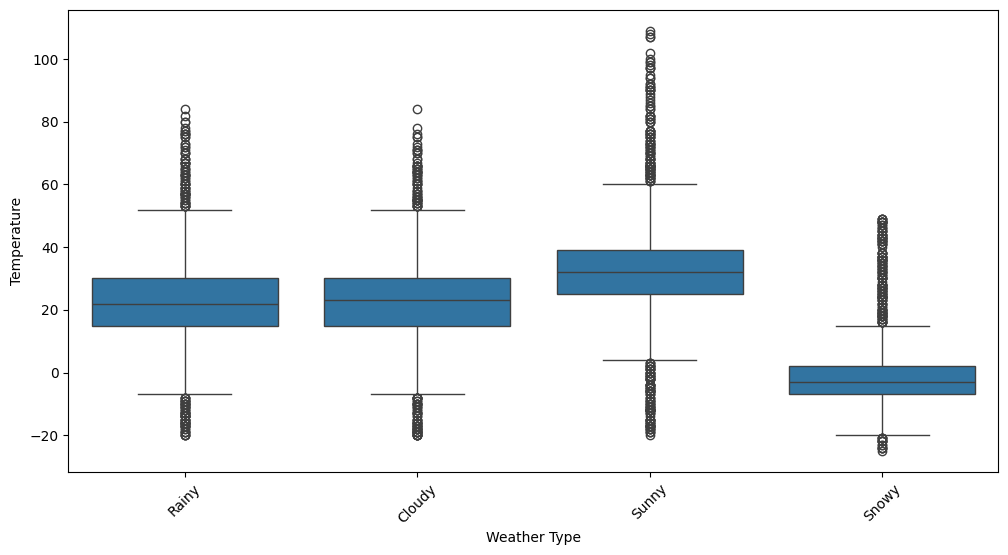

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Weather Type", y="Temperature", data=df)
plt.xticks(rotation=45)
plt.savefig(os.path.join(figure, 'Weather_Type_vs_Temperature.png'))
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_18532\197764421.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Acer\AppData\Local\Temp\ipykernel_18532\197764421.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Acer\AppData\Local\Temp\ipykernel_18532\197764421.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Acer\AppData\Local\Temp\ipykernel_18532\197764421.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\U

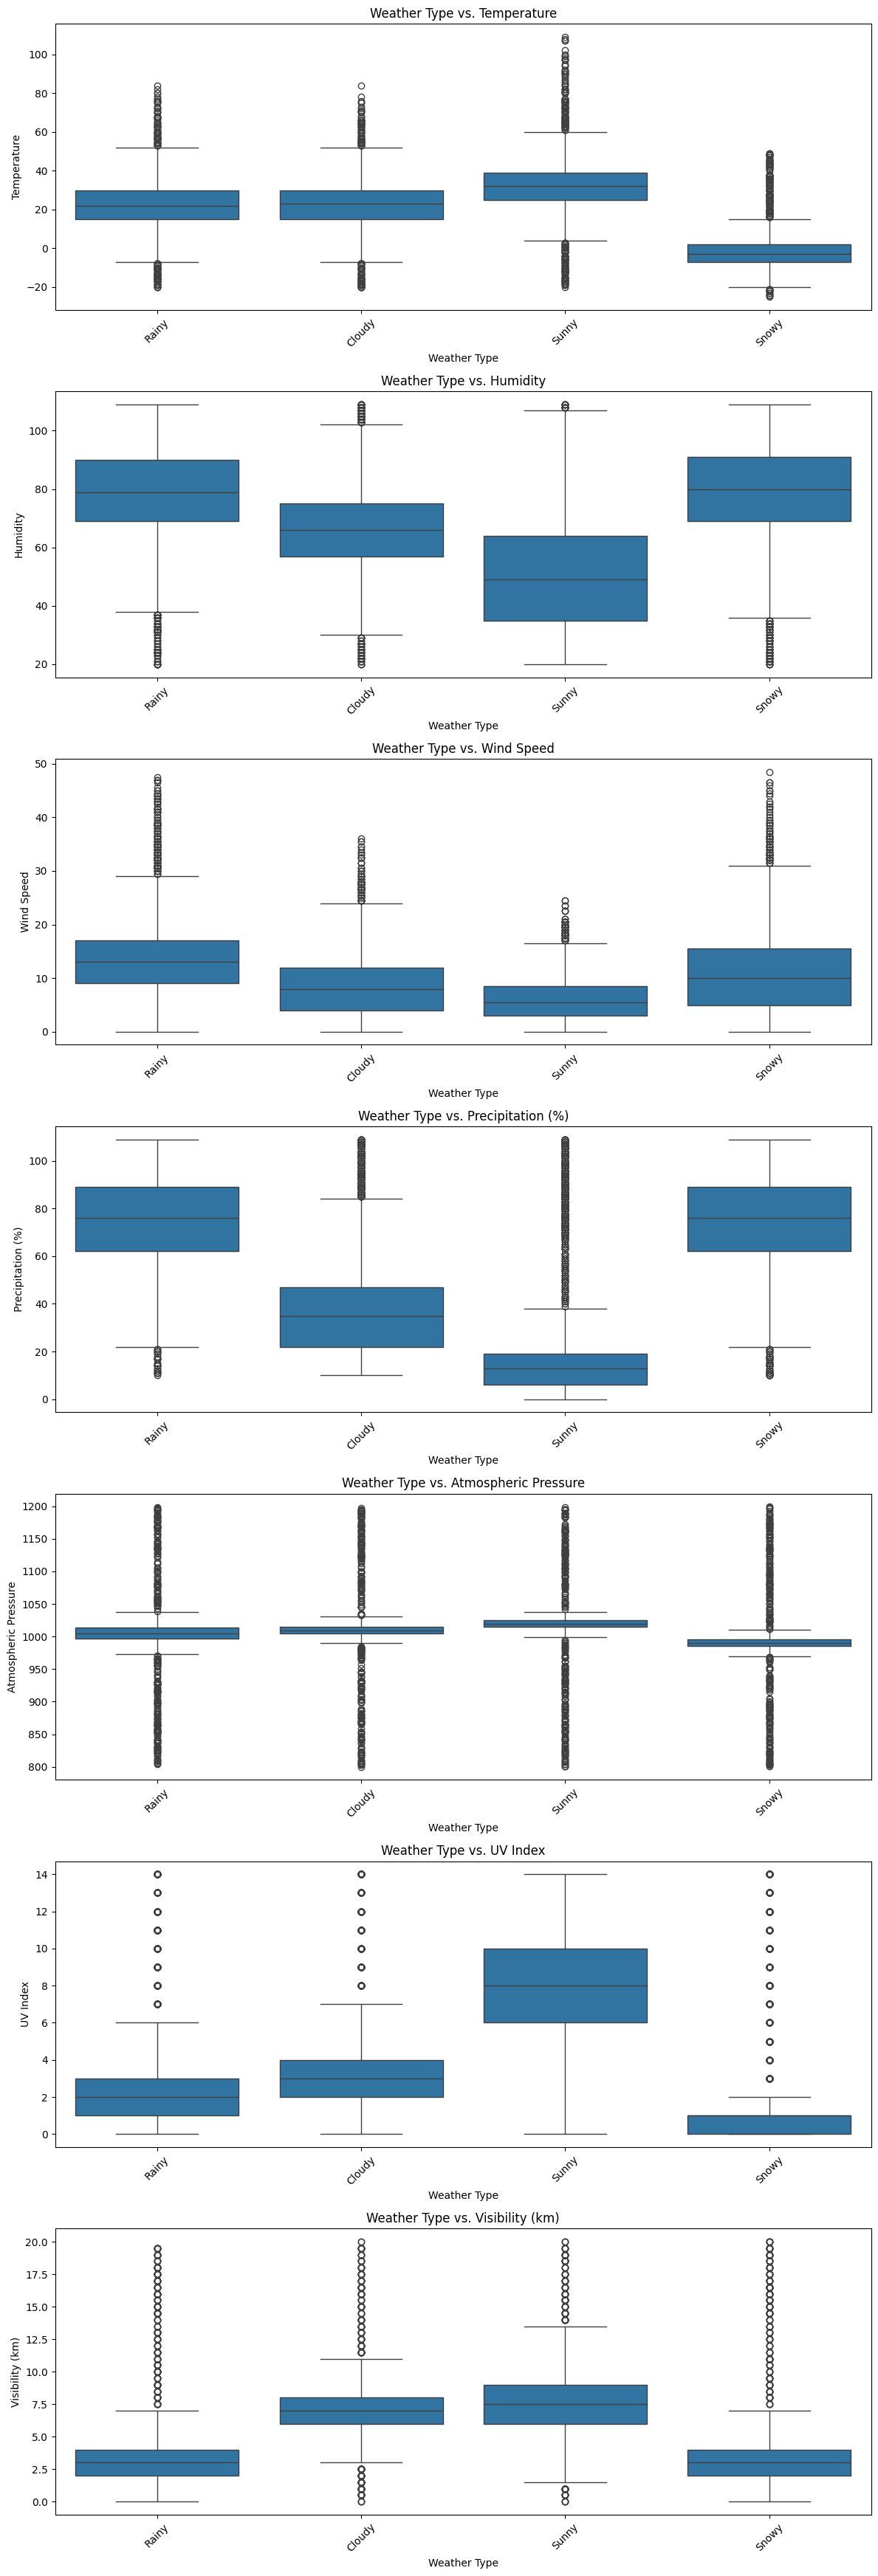

In [16]:
fig, axes = plt.subplots(nrows=len(num_feat), ncols=1, figsize=(12, 5 * len(num_feat)))

for ax, feature in zip(axes, num_feat):
    sns.boxplot(x="Weather Type", y=feature, data=df, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(f"Weather Type vs. {feature}")

plt.tight_layout()
plt.savefig(os.path.join(figure, "Weather_Type_vs_Numerical_Features_Boxplot.png"))
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_18532\126294205.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Acer\AppData\Local\Temp\ipykernel_18532\126294205.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Acer\AppData\Local\Temp\ipykernel_18532\126294205.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Acer\AppData\Local\Temp\ipykernel_18532\126294205.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\U

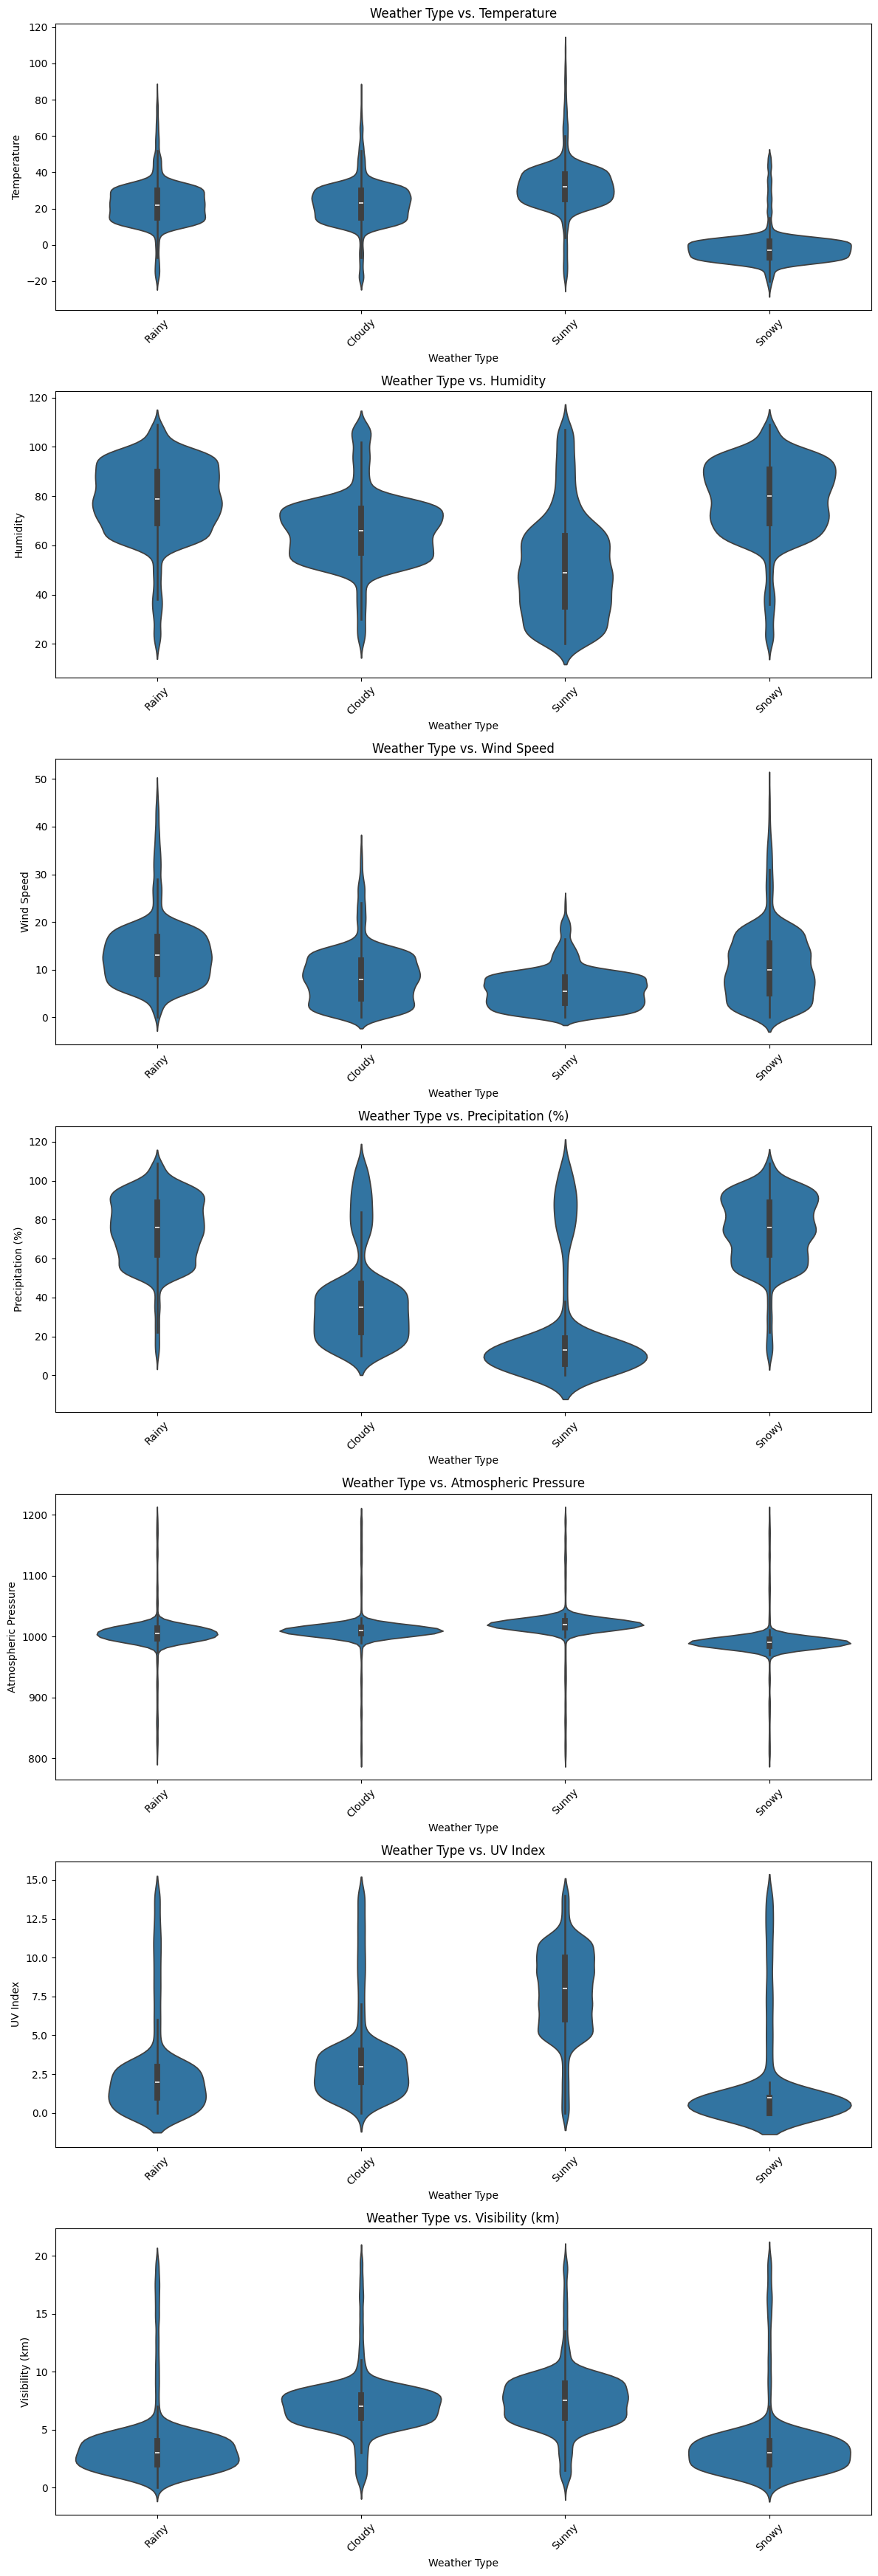

In [17]:
fig, axes = plt.subplots(nrows=len(num_feat), ncols=1, figsize=(12, 5 * len(num_feat)))

for ax, feature in zip(axes, num_feat):
    sns.violinplot(x="Weather Type", y=feature, data=df, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(f"Weather Type vs. {feature}")

plt.tight_layout()
plt.savefig(os.path.join(figure, "Weather_Type_vs_Numerical_Features_Violinplot.png"))
plt.show()